In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import skimage

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/Users/thoma/code/ml-ue3/"
train_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Training")
test_data_directory = os.path.join(ROOT_PATH, "TrafficSigns/Testing")

train_images, train_labels = load_data(train_data_directory)
test_images, test_labels = load_data(test_data_directory)

In [3]:
type(train_images)

list

In [4]:
train_images, train_labels = np.array(train_images), np.array(train_labels)
test_images, test_labels = np.array(test_images), np.array(test_labels)

In [5]:
train_images.shape, train_labels.shape

((4575,), (4575,))

In [6]:
test_images.shape, test_labels.shape

((2520,), (2520,))

In [7]:
images = np.concatenate((train_images, test_images), axis=0)

In [8]:
labels = np.concatenate((train_labels, test_labels), axis=0)

In [9]:
images.shape

(7095,)

In [10]:
labels.shape

(7095,)

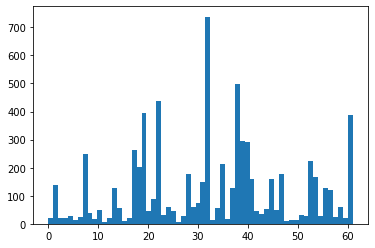

In [11]:
# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

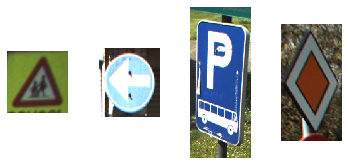

In [12]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 7094]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

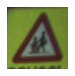

shape: (62, 61, 3), min: 3, max: 160


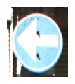

shape: (110, 96, 3), min: 3, max: 255


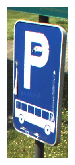

shape: (379, 153, 3), min: 0, max: 255


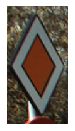

shape: (187, 97, 3), min: 0, max: 255


In [13]:
traffic_signs = [300, 2250, 3650, 7094]

# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

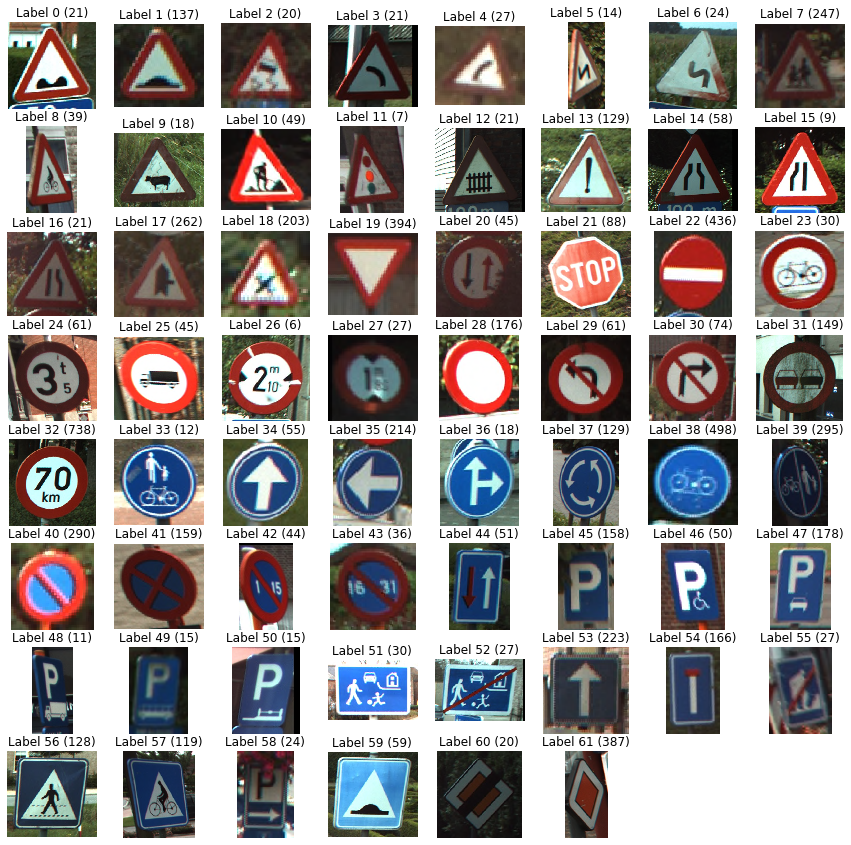

In [14]:
# Get the unique labels 
unique_labels = set(train_labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[np.where(labels == label)[0][0]]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, np.count_nonzero(labels == label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [15]:
from skimage import transform 

# Rescale the images in the `images` array
images = [transform.resize(image, (28, 28)) for image in images]

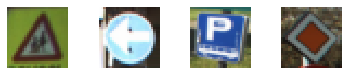

In [16]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 7094]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [17]:
from skimage.color import rgb2gray

# Convert `images28` to an array
images = np.array(images)

# Convert `images28` to grayscale
images_grey = rgb2gray(images)

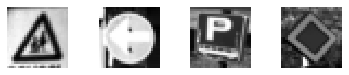

In [18]:
traffic_signs = [300, 2250, 3650, 7094]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images_grey[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [19]:
images_grey.shape

(7095, 28, 28)

In [20]:
from sklearn.model_selection import train_test_split

X_train_color, X_test_color, X_train_grey, X_test_grey, y_train, y_test = train_test_split(images, images_grey, labels)

In [21]:
X_train_reshaped_grey = X_train_grey.reshape(5321, 28, 28, 1) / 255
X_test_reshaped_grey = X_test_grey.reshape(1774, 28, 28, 1) / 255

In [22]:
X_train_reshaped_color = X_train_color.reshape(5321, 28, 28, 3) / 255
X_test_reshaped_color = X_test_color.reshape(1774, 28, 28, 3) / 255

In [23]:
X_train_reshaped_grey.shape, X_test_reshaped_grey.shape, y_train.shape, y_test.shape

((5321, 28, 28, 1), (1774, 28, 28, 1), (5321,), (1774,))

In [24]:
X_train_reshaped_color.shape, X_test_reshaped_color.shape, y_train.shape, y_test.shape

((5321, 28, 28, 3), (1774, 28, 28, 3), (5321,), (1774,))

In [25]:
from keras.utils import to_categorical

y_train_coded = to_categorical(y_train)
y_test_coded = to_categorical(y_test)

print(y_train_coded[0])

Using TensorFlow backend.


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
y_train_coded.shape[1]

62

In [27]:
def plot_history(history): 
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].plot(history.history['loss'])
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylim([0, 2])
    ax[0].set_title('Loss over Epochs')
    ax[0].plot(history.history['val_loss'])
    ax[0].legend(['Training loss', 'Prediction loss'])

    ax[1].plot(history.history['acc'])
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylim([0, 1])
    ax[1].set_title('Accuracy over Epochs')
    ax[1].plot(history.history['val_acc'])
    ax[1].legend(['Training accuracy', 'Prediction accuracy'])

    fig.suptitle("Model Quality over Epochs")

    plt.show()

In [28]:
type(images_grey)

numpy.ndarray

In [29]:
# for i in range(len(images)):
#     plt.imsave('images_colored/image_' + str(i) + '.png', images[i])

[]

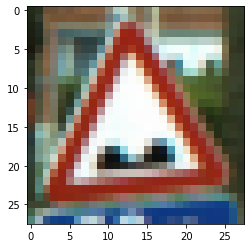

In [30]:
plt.imshow(images[1])
plt.plot()

In [31]:
# np.savetxt("labels.csv", labels, delimiter=",", encoding='utf-8')

In [32]:
len(labels)

7095

In [33]:
# a = pd.read_csv("labels.csv", header=None)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [35]:
model_1 = Sequential()
model_1.add(Conv2D(5, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='same', strides=2, dilation_rate=1))
model_1.add(MaxPool2D(2))
model_1.add(BatchNormalization())

model_1.add(Conv2D(15, kernel_size=3, activation='relu', input_shape=(28, 28, 1), padding='same', strides=1, dilation_rate=1))
model_1.add(MaxPool2D(2))
model_1.add(Flatten())
model_1.add(Dense(62, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [36]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 5)         50        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 5)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 5)           20        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 15)          690       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 135)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 62)                8432      
Total para

In [37]:
model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [38]:
model_1_training = model_1.fit(
    X_train_reshaped_grey,
    y_train_coded, 
    validation_data=(X_test_reshaped_grey, y_test_coded),
    epochs=50
)

Instructions for updating:
Use tf.cast instead.
Train on 5321 samples, validate on 1774 samples
Epoch 1/50
5321/5321 [==============================] - 3s 594us/step - loss: 3.7084 - acc: 0.0866 - val_loss: 3.5412 - val_acc: 0.1071
Epoch 2/50
5321/5321 [==============================] - 2s 458us/step - loss: 3.3379 - acc: 0.1590 - val_loss: 3.2308 - val_acc: 0.2272
Epoch 3/50
5321/5321 [==============================] - 2s 461us/step - loss: 2.7784 - acc: 0.3146 - val_loss: 2.5700 - val_acc: 0.3946
Epoch 4/50
5321/5321 [==============================] - 3s 474us/step - loss: 2.1530 - acc: 0.4587 - val_loss: 2.0345 - val_acc: 0.4994
Epoch 5/50
5321/5321 [==============================] - 2s 439us/step - loss: 1.7345 - acc: 0.5505 - val_loss: 1.7795 - val_acc: 0.5547
Epoch 6/50
5321/5321 [==============================] - 3s 488us/step - loss: 1.4540 - acc: 0.6142 - val_loss: 1.5449 - val_acc: 0.6184
Epoch 7/50
5321/5321 [==============================] - 2s 438us/step - loss: 1.2638 - a

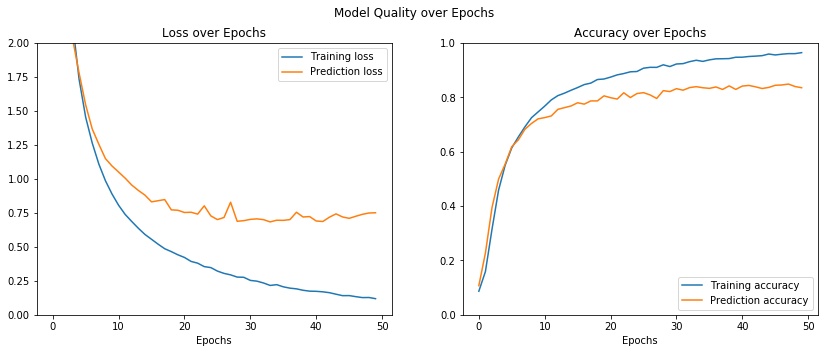

In [39]:
plot_history(model_1_training)

In [40]:
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu', padding='same', strides=2))
model_2.add(BatchNormalization())

model_2.add(MaxPool2D(2))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', dilation_rate=2))
model_2.add(BatchNormalization())

model_2.add(MaxPool2D(2))
model_2.add(Dropout(0.35))

model_2.add(Flatten())
model_2.add(Dense(62, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [41]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 7, 16)          64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 16)          0         
__________

In [42]:
model_2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [43]:
model_2_training = model_2.fit(
    X_train_reshaped_grey,
    y_train_coded, 
    validation_data=(X_test_reshaped_grey, y_test_coded),
    epochs=50
)

Train on 5321 samples, validate on 1774 samples
Epoch 1/50
5321/5321 [==============================] - 13s 3ms/step - loss: 3.3231 - acc: 0.2028 - val_loss: 3.5619 - val_acc: 0.1167
Epoch 2/50
5321/5321 [==============================] - 11s 2ms/step - loss: 2.4398 - acc: 0.3971 - val_loss: 2.3151 - val_acc: 0.4521
Epoch 3/50
5321/5321 [==============================] - 11s 2ms/step - loss: 1.8083 - acc: 0.5401 - val_loss: 2.3912 - val_acc: 0.3574
Epoch 4/50
5321/5321 [==============================] - 11s 2ms/step - loss: 1.4098 - acc: 0.6213 - val_loss: 2.7989 - val_acc: 0.2796
Epoch 5/50
5321/5321 [==============================] - 11s 2ms/step - loss: 1.1438 - acc: 0.6877 - val_loss: 0.8732 - val_acc: 0.7700
Epoch 6/50
5321/5321 [==============================] - 11s 2ms/step - loss: 0.9681 - acc: 0.7296 - val_loss: 0.9111 - val_acc: 0.7475
Epoch 7/50
5321/5321 [==============================] - 10s 2ms/step - loss: 0.8581 - acc: 0.7570 - val_loss: 0.7331 - val_acc: 0.7909
Epoch 8

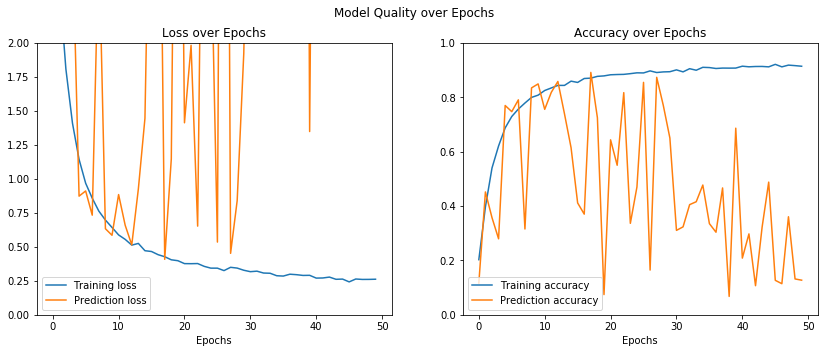

In [44]:
plot_history(model_2_training)

In [45]:
model_3 = Sequential()

model_3.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(MaxPool2D(2))
model_3.add(Dropout(0.2))

model_3.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model_3.add(BatchNormalization())

model_3.add(MaxPool2D(2))
model_3.add(Dropout(0.3))

model_3.add(Flatten())
model_3.add(Dense(62, activation='softmax'))

In [46]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 16)        4624      
__________

In [47]:
model_3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [48]:
model_3_training = model_3.fit(
    X_train_reshaped_grey,
    y_train_coded, 
    validation_data=(X_test_reshaped_grey, y_test_coded),
    epochs=50
)

Train on 5321 samples, validate on 1774 samples
Epoch 1/50
5321/5321 [==============================] - 90s 17ms/step - loss: 2.3801 - acc: 0.4787 - val_loss: 2.0071 - val_acc: 0.4910
Epoch 2/50
5321/5321 [==============================] - 85s 16ms/step - loss: 0.6926 - acc: 0.8062 - val_loss: 0.7579 - val_acc: 0.8151
Epoch 3/50
5321/5321 [==============================] - 85s 16ms/step - loss: 0.3674 - acc: 0.8910 - val_loss: 0.5009 - val_acc: 0.8664
Epoch 4/50
5321/5321 [==============================] - 86s 16ms/step - loss: 0.2497 - acc: 0.9295 - val_loss: 0.4651 - val_acc: 0.8816
Epoch 5/50
5321/5321 [==============================] - 85s 16ms/step - loss: 0.1795 - acc: 0.9464 - val_loss: 0.4938 - val_acc: 0.8715
Epoch 6/50
5321/5321 [==============================] - 85s 16ms/step - loss: 0.1276 - acc: 0.9609 - val_loss: 0.4019 - val_acc: 0.9002
Epoch 7/50
5321/5321 [==============================] - 86s 16ms/step - loss: 0.0958 - acc: 0.9712 - val_loss: 0.4527 - val_acc: 0.8771


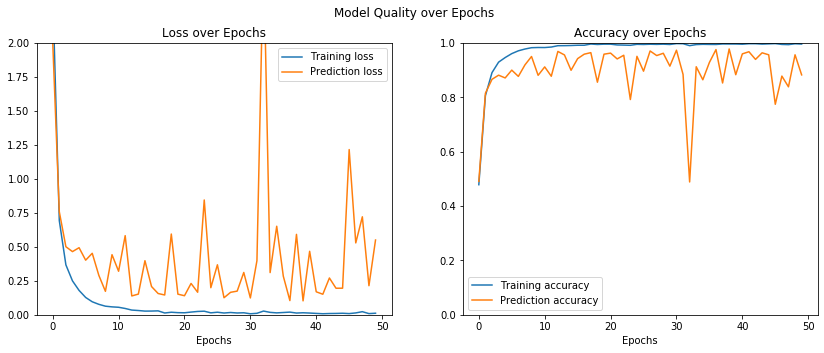

In [49]:
plot_history(model_3_training)

In [50]:
# model = Sequential()
# model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(num_classes, activation='softmax'))

In [51]:
model_4 = Sequential()

model_4.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 1), activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(2))
model_4.add(Dropout(0.2))

model_4.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(2))
model_4.add(Dropout(0.3))

model_4.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model_4.add(BatchNormalization())
model_4.add(MaxPool2D(2))
model_4.add(Dropout(0.4))

model_4.add(Flatten())
model_4.add(Dense(62, activation='softmax'))

In [52]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
__________

In [53]:
model_4.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [54]:
# model_4_training = model_4.fit(
#     X_train_reshaped_grey,
#     y_train_coded, 
#     validation_data=(X_test_reshaped_grey, y_test_coded),
#     epochs=50
# )

Train on 5321 samples, validate on 1774 samples
Epoch 1/50
5321/5321 [==============================] - 156s 29ms/step - loss: 2.4466 - acc: 0.5119 - val_loss: 1.3610 - val_acc: 0.7057
Epoch 2/50
5321/5321 [==============================] - 154s 29ms/step - loss: 0.6664 - acc: 0.8164 - val_loss: 0.4355 - val_acc: 0.8957
Epoch 3/50
5321/5321 [==============================] - 151s 28ms/step - loss: 0.3647 - acc: 0.8914 - val_loss: 0.3141 - val_acc: 0.9200
Epoch 4/50
5321/5321 [==============================] - 149s 28ms/step - loss: 0.2415 - acc: 0.9308 - val_loss: 0.3290 - val_acc: 0.9188
Epoch 5/50
5321/5321 [==============================] - 222s 42ms/step - loss: 0.1759 - acc: 0.9442 - val_loss: 0.3099 - val_acc: 0.9087
Epoch 6/50
5321/5321 [==============================] - 264s 50ms/step - loss: 0.1524 - acc: 0.9521 - val_loss: 1.0517 - val_acc: 0.7384
Epoch 7/50
5321/5321 [==============================] - 239s 45ms/step - loss: 0.1070 - acc: 0.9681 - val_loss: 0.2462 - val_acc: 

KeyboardInterrupt: 

In [ ]:
plot_history(model_4_training)

In [55]:
model_5 = Sequential()
model_5.add(Conv2D(5, kernel_size=3, activation='relu', input_shape=(28, 28, 3), padding='same', strides=2, dilation_rate=1))
model_5.add(MaxPool2D(2))
model_5.add(BatchNormalization())

model_5.add(Conv2D(15, kernel_size=3, activation='relu', input_shape=(28, 28, 3), padding='same', strides=1, dilation_rate=1))
model_5.add(MaxPool2D(2))
model_5.add(Flatten())
model_5.add(Dense(62, activation='softmax'))

In [56]:
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 14, 14, 5)         140       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 5)           0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 7, 7, 5)           20        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 15)          690       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 15)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 135)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 62)                8432      
Total para

In [57]:
model_5.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [58]:
model_5_training = model_5.fit(
    X_train_reshaped_color,
    y_train_coded, 
    validation_data=(X_test_reshaped_color, y_test_coded),
    epochs=50
)

Train on 5321 samples, validate on 1774 samples
Epoch 1/50
5321/5321 [==============================] - 9s 2ms/step - loss: 3.6224 - acc: 0.1099 - val_loss: 3.4015 - val_acc: 0.1274
Epoch 2/50
5321/5321 [==============================] - 12s 2ms/step - loss: 3.0091 - acc: 0.2695 - val_loss: 2.8452 - val_acc: 0.2880
Epoch 3/50
5321/5321 [==============================] - 5s 883us/step - loss: 2.0310 - acc: 0.5168 - val_loss: 2.3361 - val_acc: 0.4369
Epoch 4/50
5321/5321 [==============================] - 5s 959us/step - loss: 1.4017 - acc: 0.6388 - val_loss: 1.3972 - val_acc: 0.6607
Epoch 5/50
5321/5321 [==============================] - 5s 849us/step - loss: 1.0932 - acc: 0.7076 - val_loss: 1.2999 - val_acc: 0.6962
Epoch 6/50
5321/5321 [==============================] - 5s 910us/step - loss: 0.9046 - acc: 0.7542 - val_loss: 1.1250 - val_acc: 0.7272
Epoch 7/50
5321/5321 [==============================] - 8s 1ms/step - loss: 0.7757 - acc: 0.7865 - val_loss: 1.0176 - val_acc: 0.7401
Epoch

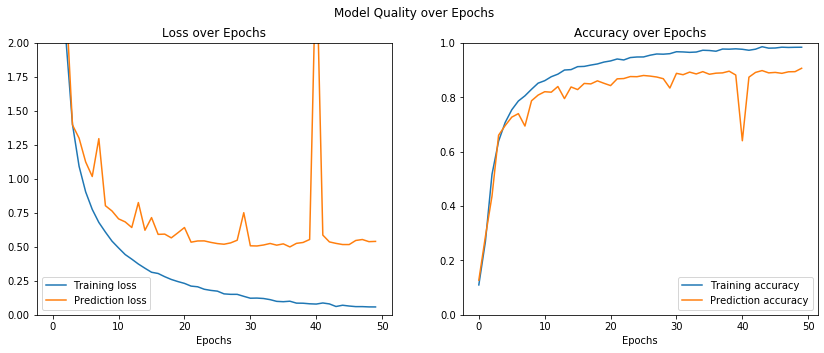

In [59]:
plot_history(model_5_training)

In [60]:
model_6 = Sequential()

model_6.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 3), activation='relu', padding='same', strides=2))
model_6.add(BatchNormalization())

model_6.add(MaxPool2D(2))
model_6.add(Dropout(0.25))

model_6.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', dilation_rate=2))
model_6.add(BatchNormalization())

model_6.add(MaxPool2D(2))
model_6.add(Dropout(0.35))

model_6.add(Flatten())
model_6.add(Dense(62, activation='softmax'))

In [61]:
model_6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 14, 14, 32)        896       
_________________________________________________________________
batch_normalization_15 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
batch_normalization_16 (Batc (None, 7, 7, 16)          64        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 16)          0         
__________

In [62]:
model_6.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [63]:
model_6_training = model_6.fit(
    X_train_reshaped_color,
    y_train_coded, 
    validation_data=(X_test_reshaped_color, y_test_coded),
    epochs=50
)

Train on 5321 samples, validate on 1774 samples
Epoch 1/50
5321/5321 [==============================] - 16s 3ms/step - loss: 3.0546 - acc: 0.2733 - val_loss: 2.8664 - val_acc: 0.2779
Epoch 2/50
5321/5321 [==============================] - 23s 4ms/step - loss: 1.9919 - acc: 0.4845 - val_loss: 2.0213 - val_acc: 0.4622
Epoch 3/50
5321/5321 [==============================] - 14s 3ms/step - loss: 1.5041 - acc: 0.5950 - val_loss: 1.1033 - val_acc: 0.7153
Epoch 4/50
5321/5321 [==============================] - 12s 2ms/step - loss: 1.2081 - acc: 0.6568 - val_loss: 2.5417 - val_acc: 0.3777
Epoch 5/50
5321/5321 [==============================] - 17s 3ms/step - loss: 1.0262 - acc: 0.6999 - val_loss: 0.7765 - val_acc: 0.7903
Epoch 6/50
5321/5321 [==============================] - 14s 3ms/step - loss: 0.8905 - acc: 0.7393 - val_loss: 0.6933 - val_acc: 0.8185
Epoch 7/50
5321/5321 [==============================] - 17s 3ms/step - loss: 0.8031 - acc: 0.7606 - val_loss: 0.5573 - val_acc: 0.8501
Epoch 8

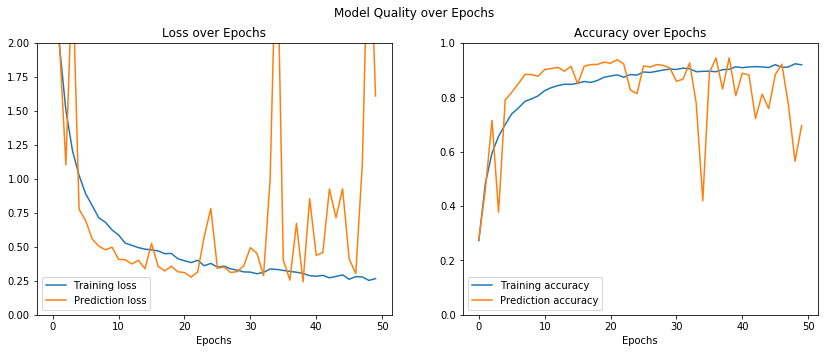

In [64]:
plot_history(model_6_training)

In [65]:
model_7 = Sequential()

model_7.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 3), activation='relu', padding='same'))
model_7.add(BatchNormalization())

model_7.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model_7.add(BatchNormalization())

model_7.add(MaxPool2D(2))
model_7.add(Dropout(0.2))

model_7.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model_7.add(BatchNormalization())

model_7.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model_7.add(BatchNormalization())

model_7.add(MaxPool2D(2))
model_7.add(Dropout(0.3))

model_7.add(Flatten())
model_7.add(Dense(62, activation='softmax'))

In [66]:
model_7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 16)        4624      
__________

In [67]:
model_7.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [68]:
model_7_training = model_7.fit(
    X_train_reshaped_color,
    y_train_coded, 
    validation_data=(X_test_reshaped_color, y_test_coded),
    epochs=50
)

Train on 5321 samples, validate on 1774 samples
Epoch 1/50
5321/5321 [==============================] - 109s 20ms/step - loss: 2.1534 - acc: 0.4920 - val_loss: 6.0986 - val_acc: 0.0451
Epoch 2/50
5321/5321 [==============================] - 85s 16ms/step - loss: 0.6506 - acc: 0.8168 - val_loss: 1.0677 - val_acc: 0.7249
Epoch 3/50
5321/5321 [==============================] - 87s 16ms/step - loss: 0.3138 - acc: 0.9119 - val_loss: 1.4984 - val_acc: 0.6336
Epoch 4/50
5321/5321 [==============================] - 89s 17ms/step - loss: 0.1865 - acc: 0.9463 - val_loss: 1.7346 - val_acc: 0.5665
Epoch 5/50
5321/5321 [==============================] - 88s 16ms/step - loss: 0.1231 - acc: 0.9664 - val_loss: 1.4212 - val_acc: 0.6618
Epoch 6/50
5321/5321 [==============================] - 102s 19ms/step - loss: 0.0900 - acc: 0.9782 - val_loss: 0.1684 - val_acc: 0.9622
Epoch 7/50
  96/5321 [..............................] - ETA: 1:51 - loss: 0.0787 - acc: 0.9792

KeyboardInterrupt: 

In [ ]:
plot_history(model_7_training)

In [ ]:
# model = Sequential()
# model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Flatten())
# model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model_8 = Sequential()

model_8.add(Conv2D(32, kernel_size=3, input_shape=(28, 28, 3), activation='relu', padding='same'))
model_8.add(BatchNormalization())
model_8.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model_8.add(BatchNormalization())
model_8.add(MaxPool2D(2))
model_8.add(Dropout(0.2))

model_8.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model_8.add(BatchNormalization())
model_8.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model_8.add(BatchNormalization())
model_8.add(MaxPool2D(2))
model_8.add(Dropout(0.3))

model_8.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model_8.add(BatchNormalization())
model_8.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model_8.add(BatchNormalization())
model_8.add(MaxPool2D(2))
model_8.add(Dropout(0.4))

model_8.add(Flatten())
model_8.add(Dense(62, activation='softmax'))

In [ ]:
model_8.summary()

In [ ]:
model_8.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
# model_8_training = model_8.fit(
#     X_train_reshaped_color,
#     y_train_coded, 
#     validation_data=(X_test_reshaped_color, y_test_coded),
#     epochs=50
# )

In [ ]:
plot_history(model_8_training)